In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [29]:
df = pd.read_csv('dados_limpos.csv', encoding='latin1', parse_dates=['DATA'])

In [30]:
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,13,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,18,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,16,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,ACIR GURGACZ,Aquisição de Material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00


In [31]:
df.dtypes

ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
dtype: object

In [32]:
df.describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO
count,26688.0,26688.000000,26688.000000,26688.000000
mean,2016.0,6.470736,15.430680,947.489558
std,0.0,3.257139,8.846572,2733.963252
min,2016.0,1.000000,1.000000,0.010000
25%,2016.0,4.000000,8.000000,123.997500
50%,2016.0,6.000000,15.000000,324.745000
75%,2016.0,9.000000,23.000000,956.762500
max,2016.0,12.000000,31.000000,256980.000000


In [33]:
df[df['VALOR_REEMBOLSADO'] == 256980]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
4637,2016,12,22,DAVI ALCOLUMBRE,Divulgações,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0


In [34]:
senadores_com_mais_gastos = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()
senadores_com_mais_gastos = senadores_com_mais_gastos.sort_values(ascending=False)

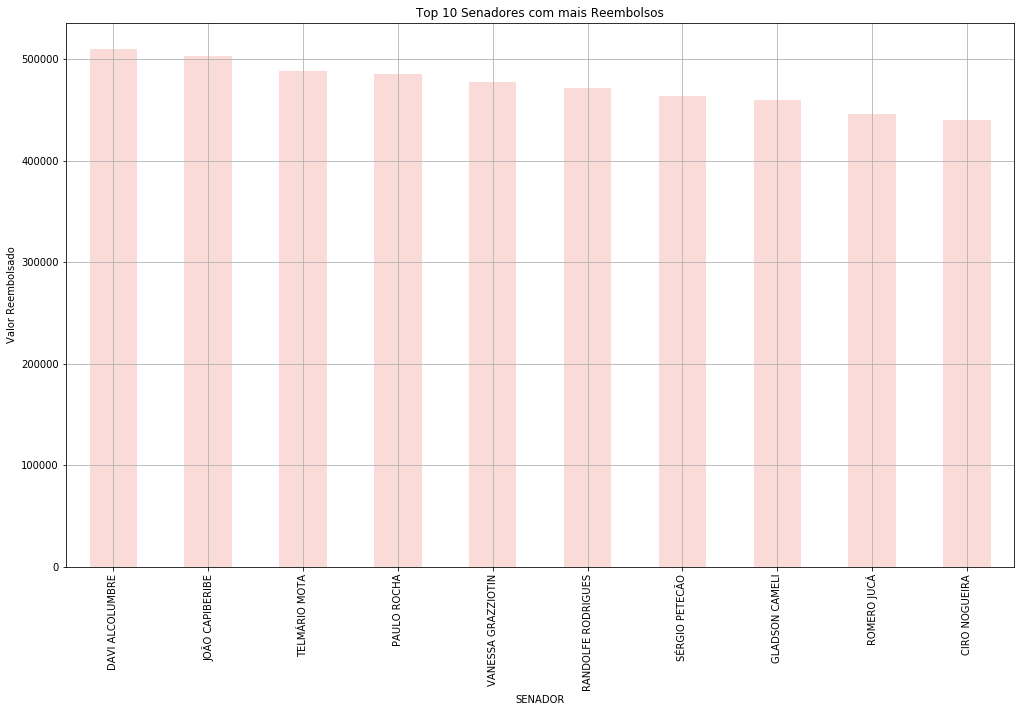

In [46]:
senadores_com_mais_gastos.head(10).plot(kind='bar', grid=True, color='#e74c3c', alpha=.2, figsize=(17,10))
plt.title('Top 10 Senadores com mais Reembolsos')
plt.ylabel('Valor Reembolsado')
plt.savefig('top_10_senadores_gastos.png')
plt.show()

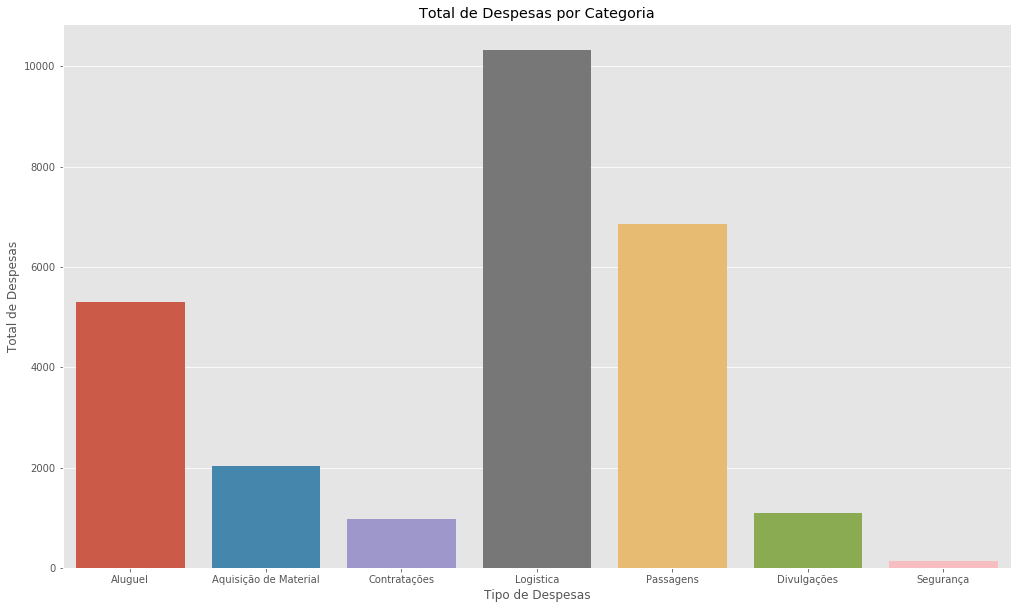

In [55]:
plt.figure(figsize=(17,10))
sns.countplot(x=df['TIPO_DESPESA'])
plt.title('Total de Despesas por Categoria')
plt.ylabel('Total de Despesas')
plt.xlabel('Tipo de Despesas')
plt.show()

In [64]:
df['ANO_MES'] = df['DATA'].dt.strftime('%Y-%m')

In [65]:
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,ANO_MES
0,2016,1,13,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,2016-01
1,2016,1,18,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,2016-01
2,2016,1,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,2016-04
3,2016,1,16,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,2016-01
4,2016,1,1,ACIR GURGACZ,Aquisição de Material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,2016-06


In [87]:
pivot_df = df.pivot_table(index='ANO_MES', 
                           columns='TIPO_DESPESA', 
                           values='VALOR_REEMBOLSADO', 
                           aggfunc=np.sum,
                           fill_value=0)

pivot_df = pivot_df.loc['2016-01':'2016-12']

In [88]:
pivot_df

TIPO_DESPESA,Aluguel,Aquisição de Material,Contratações,Divulgações,Logistica,Passagens,Segurança
ANO_MES,,,,,,,
2016-01,681720.72,130287.53,519205.27,419496.30,878387.57,423176.74,284426.09
2016-02,355621.91,103718.82,286143.29,252818.74,592530.48,487826.19,21832.40
2016-03,361367.60,94986.41,255112.80,291705.97,440847.14,586842.49,33859.82
2016-04,392789.93,93684.00,243225.69,224044.85,462819.68,549032.37,21978.24
2016-05,765999.20,80266.83,275629.88,263856.45,476910.51,520546.83,39480.96
2016-06,371057.80,90153.46,219292.74,320627.83,423650.18,624275.09,13873.95
2016-07,306088.26,67689.75,136238.66,200566.67,475541.95,453256.15,7124.31
2016-08,252439.17,78291.64,202764.55,256752.60,420363.64,578393.33,34069.32
2016-09,334052.65,78875.75,107722.85,200740.90,473085.66,469299.83,9194.48


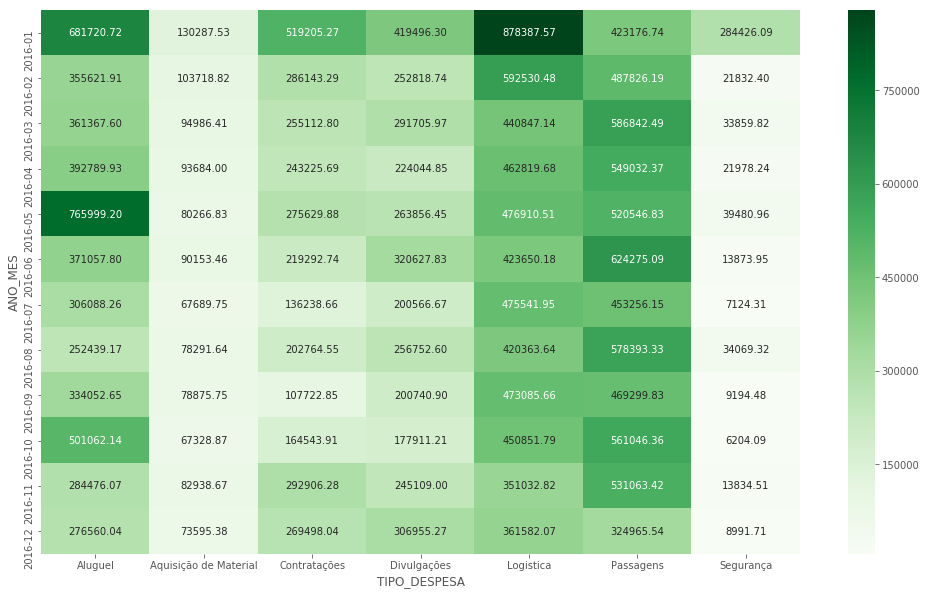

In [89]:
plt.figure(figsize=(17,10))
sns.heatmap(pivot_df, annot=True, fmt='.2f', cmap='Greens')
plt.show()

In [70]:
#df[df['ANO_MES'] == '1977-10']['ANO'] = 
df[df['ANO_MES'] == '1977-10']

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,ANO_MES
17926,2016,10,10,PAULO PAIM,Logistica,37.063.328/0030-00,Auto Shopping Derivados de Petroleo Ltda,621942,1977-10-10,Aquisição de combustível para veículos utiliza...,152.51,1977-10


In [74]:
df.iloc[0]

ANO                                                               2016
MES                                                                  1
DIA                                                                 13
SENADOR                                                   ACIR GURGACZ
TIPO_DESPESA                                                   Aluguel
CNPJ_CPF                                            05.914.650/0001-66
FORNECEDOR                            ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA
DOCUMENTO                                                    000011328
DATA                                               2016-01-13 00:00:00
DETALHAMENTO         Despesa com pagamento de energia elétrica para...
VALOR_REEMBOLSADO                                                 73.6
ANO_MES                                                        2016-01
Name: 0, dtype: object